In [1]:
import numpy as np
import cv2
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
classes = ('Face', 'Non-face')

## For Test Set

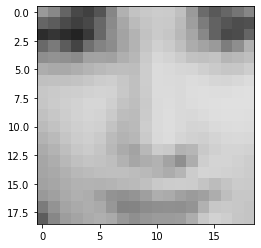

In [3]:
DATADIR = "Facedataset2/test/"

CATEGORIES = ["face","non-face"] #Folders in dataset

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
    break  #...and one more!

In [4]:
testing_data = []
def create_testing_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  #classify as 0, 1
        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                testing_data.append([img_array, class_num])  # add this to our training_data
                                         
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [5]:
create_testing_data()

print(len(testing_data))

100%|██████████| 23573/23573 [00:01<00:00, 22802.32it/s]

24045


## For TrainSet

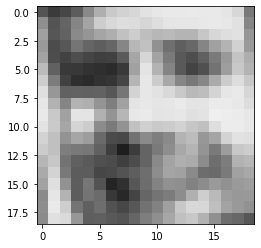

In [6]:
DATADIR = "Facedataset2/train/train/"

CATEGORIES = ["face","non-face"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
    break  #...and one more!

In [7]:
training_data = []
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1).

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                training_data.append([img_array, class_num])  # add this to our training_data
                                         
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [8]:
create_training_data()

print(len(training_data))

100%|██████████| 4548/4548 [00:00<00:00, 21479.29it/s]

6977


In [11]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [12]:
trainloader = torch.utils.data.DataLoader(training_data, batch_size=32, shuffle=True, num_workers=2)

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 5)
        
        self.fc1 = nn.Linear(16 * 1 * 1, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x.float())), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x.float())), (2, 2))
        x = x.view(x.size(0), -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [14]:
net = ConvNet()

In [15]:
import torch.optim as optim

criteria = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [16]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        inputs = inputs.permute(0,3,2,1)
        
        print(type(inputs))
        print(type(labels))
        print(inputs.size())
        print(inputs.dim())
        
        outputs = net(inputs)
        
        loss = criteria(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print("[{}, {}], Loss: {}".format(epoch + 1, i + 1, running_loss / 2000.))
            running_loss = 0.0
print("Finished Training")

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torc

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torc

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torc

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torc

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torc

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torc

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torc

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torc

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torc

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 3, 19, 19])
4
<class 'torc

In [17]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## Testing

In [21]:
testloader = torch.utils.data.DataLoader(testing_data, batch_size=32, shuffle=False, num_workers=2)

In [22]:
import numpy as np
import torchvision

dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.permute(0,3,2,1)    
outputs = net(images)
_, predicted = torch.max(outputs, 1)

for i in range(30):    
   print("Actual {}\tPredicted: {}".format(classes[labels[i]], classes[predicted[i]]))

Actual Face	Predicted: Face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Face
Actual Face	Predicted: Face
Actual Face	Predicted: Face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Face
Actual Face	Predicted: Face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Non-face
Actual Face	Predicted: Face
Actual Face	Predicted: Face
Actual Face	Predicted: Non-face


In [23]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0,3,2,1)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 97 %
